In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from scipy.optimize import curve_fit

In [2]:
!head -n 1 volume_and_excentricity/300.vae

# Void_ID, X_c, Y_c, Z_c, N_particles, R=(abc)^(-1/3), a, b, c, vector_a, vector_b, vector_c 


(-360.0, 360.0)

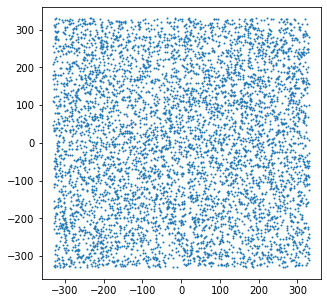

In [3]:
Voids300 = np.loadtxt("volume_and_excentricity/300.vae", delimiter=",")
Voids200 = np.loadtxt("volume_and_excentricity/200.vae", delimiter=",")
Voids150 = np.loadtxt("volume_and_excentricity/150.vae", delimiter=",")

def TrimCatalog(ellip_cat):
    BoxLength = 720
    Trim = 30
    halfboxtrim = BoxLength/2 - Trim
    index = np.where( 
            (abs(ellip_cat[:,1]) < halfboxtrim)   & 
            (abs(ellip_cat[:,2]) < halfboxtrim)   & 
            (abs(ellip_cat[:,3]) < halfboxtrim) )
    return ellip_cat[index]




fig = plt.figure(figsize=(5,5))
BoxLength = 720
Trim = 30
halfboxtrim = BoxLength/2 - Trim
index = np.where( 
            (abs(Voids300[:,1]) < halfboxtrim)   & 
            (abs(Voids300[:,2]) < halfboxtrim)   & 
            (abs(Voids300[:,3]) < halfboxtrim) )

plt.scatter( Voids300[index,1], Voids300[index,2], s=1)
plt.xlim(-BoxLength/2, BoxLength/2)
plt.ylim(-BoxLength/2, BoxLength/2)

In [4]:
voids300 = TrimCatalog(Voids300)
voids200 = TrimCatalog(Voids200)
voids150 = TrimCatalog(Voids150)

void_catalogs = [voids300, voids200, voids150]
labels = ["300 km/s", "200 km/s", "150 km/s"]

ncats = len(void_catalogs)

In [5]:
# Adderman 2017, MNRAS 468 3381 - 3394
# Ellipticity and Prolatness definitions according 
# to BOSS void analysis.

# a = major semi-axis
# c = minor semi-axis


def ellipticity(a,b,c):
    return (1/4.)*((a**2 - c**2) / (a**2 + b**2 + c**2))

def prolatness(a,b,c):
    return(1/4.)*( (b**2-c**2)+(b**2 - a**2)) / (a**2 + b**2 + c**2)


## To do the prolate/oblate scatter plot.
def density_estimation(m1, m2, xmin, xmax, ymin, ymax):
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]                                                     
    positions = np.vstack([X.ravel(), Y.ravel()])                                                       
    values = np.vstack([m1, m2])                                                                        
    kernel = scipy.stats.gaussian_kde(values)                                                                 
    Z = np.reshape(kernel(positions).T, X.shape)
    return X, Y, Z


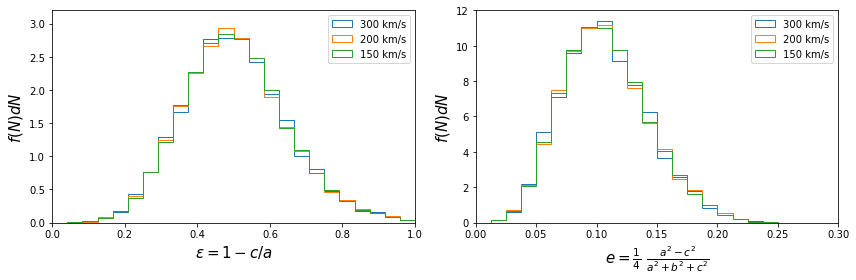

In [6]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)

for i in range(ncats):
    a = void_catalogs[i][:,6]
    b = void_catalogs[i][:,7]
    c = void_catalogs[i][:,8]
    e1 = 1 - c/a
    e1_hist, bins, stuff = ax1.hist(e1, bins=np.linspace(0,1,25), 
                                   density=True, histtype="step", label=labels[i])  
plt.legend(loc=0)    
plt.xlim(0,1)
plt.ylim(0,3.2)
plt.ylabel(r"$f(N)dN$", fontsize=15)
plt.xlabel(r"$\epsilon = 1 - c/a$", fontsize=15)

ax2 = fig.add_subplot(122)
for i in range(ncats):
    a = void_catalogs[i][:,6]
    b = void_catalogs[i][:,7]
    c = void_catalogs[i][:,8]
    e2 = ellipticity(a,b,c)
    e2_hist, bins, stuff = ax2.hist(e2, bins=np.linspace(0,0.3,25), 
                               density=True, histtype="step", label=labels[i])

    
plt.legend(loc=0)    
plt.xlim(0,0.3)
plt.ylim(0,12)
plt.ylabel(r"$f(N)dN$", fontsize=15)
plt.xlabel(r"$e = \frac{1}{4}\mathrm{\ }\frac{a^2 -c^2}{a^2 + b^2 + c^2}$", fontsize=15)


plt.tight_layout()

#plt.savefig("figures/2eccentricity_different_velocities.pdf")


In [7]:
Volume = (BoxLength - Trim) ** 3
print(Volume)

328509000


# Density Volume Plot 

Text(0.5, 0, '$R$ (Mpc/h)')

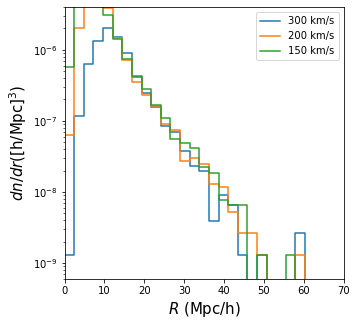

In [8]:
fig   = plt.figure(figsize=(5,5))

NBINS = 30
R_min = 0
R_max = 70

BINS  = np.linspace(R_min, R_max, NBINS)
Bin_width = (BINS[-1] - BINS[0]) / NBINS

Bins_plt = []
for h in range(NBINS -1):
    Bins_plt.extend([BINS[h], BINS[h+1]])

bins_c = []
for j in range(NBINS-1):
    bins_c.append((BINS[j+1] + BINS[j]) / 2)
bins_c = np.array(bins_c)

ncats = len(void_catalogs)

for i in range(ncats):
    R = void_catalogs[i][:,5]
    R_hist, bin_edges = np.histogram(R, bins=BINS)
    
    R_hist = R_hist / (Volume * Bin_width)
    
    R_hisplt = [R_hist[0]]
    for h in range(NBINS - 2):
        R_hisplt.extend([R_hist[h], R_hist[h+1]])
    R_hisplt.append(R_hist[-1])
    
    plt.plot(Bins_plt, R_hisplt, label=labels[i])
    #plt.fill_between(Bins_plt, 1e-12, R_hisplt, label=labels[i], alpha=0.5)
    
plt.legend(loc=0)    
plt.xlim(R_min, R_max)
plt.ylim(6e-10,4e-6)
plt.yscale("log")
plt.ylabel(r"$ dn / dr (\mathrm{ [h/Mpc]}^3)$", fontsize=15)
plt.xlabel(r"$R$ (Mpc/h)", fontsize=15)


In [9]:
R_cut = 10 # Mpc/h

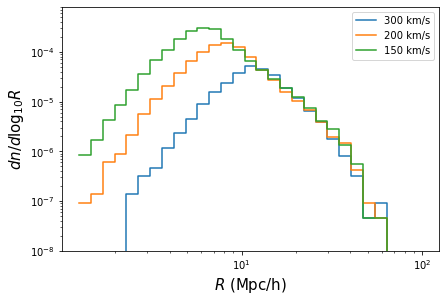

In [10]:
fig   = plt.figure(figsize=(6,4))

NBINS = 30

lnR_min = 0.1
lnR_max = 2.0


BINS  = np.linspace(lnR_min, lnR_max, NBINS)
Bin_width = (BINS[1] - BINS[0])

# Bins Edges array to plot steps.
X = []
for h in range(NBINS -1):
    X.extend([BINS[h], BINS[h+1]])
X = np.array(X)
    
# Bins centers
Bins_c = (BINS[:-1] + BINS[1:])/2
Bins_c = np.array(Bins_c)

ncats = len(void_catalogs)

VoidSizeFunction = []

for i in range(ncats):
    R = void_catalogs[i][:,5]
    log10R_hist, bin_edges = np.histogram( np.log10(R), bins=BINS)
    
    log10R_hist = log10R_hist / (Volume * Bin_width)
    
    Y = [log10R_hist[0]]
    for h in range(NBINS - 2):
        Y.extend([log10R_hist[h], log10R_hist[h+1]])
    Y.append(log10R_hist[-1])
    
    Y = np.array(Y)
    plt.plot(10**X, Y, label=labels[i])
    
    
    for j in range(len(log10R_hist)):
        if log10R_hist[j] == 0:
            log10R_hist[j] = np.nan
            
    log10R_hist = np.array(log10R_hist)
    
    VoidSizeFunction.append(np.vstack([Bins_c,log10R_hist]))
    

plt.legend(loc=0)    
#plt.xlim(lnR_min, lnR_max)
plt.ylim(1e-8,8e-4)
plt.yscale("log")
plt.xscale("log")
plt.ylabel(r"$ dn / d \log_{10} R$", fontsize=15)
plt.xlabel(r"$R$ (Mpc/h)", fontsize=15)
plt.tight_layout()
#plt.grid(True, which='both', axis="x")
#plt.grid(True, which='both', axis="y")
plt.tight_layout(pad=0, rect=(0, 0, 1, 1))
#plt.savefig("figures/void_size_function.pdf")

Check this paper:

http://inspirehep.net/record/1421620/plots

Testing cosmology with a catalogue of voids in the BOSS galaxy surveys - Nadathur, Seshadri Mon.Not.Roy.Astron.Soc. 461 (2016) no.1, 358-370 arXiv:1602.04752 [astro-ph.CO]


In [11]:
def two_power_law_LOG10(X, n1, n2, R0, N0):
    x = 10**X
    return np.log10(N0 * ( (x/R0)**n1 + (x/R0)**(-n2) )**(-1))

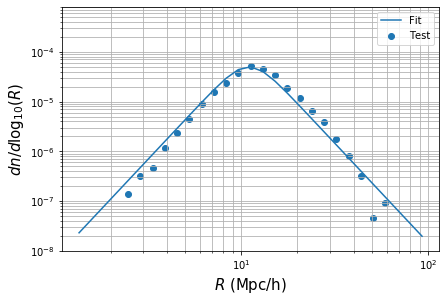

In [12]:
p0 = [4,4,11,10**-4]

plt.plot(10**Bins_c, 10**two_power_law_LOG10(Bins_c, 4, 4, 11, 0.0001), label="Fit")

plt.scatter(10**VoidSizeFunction[0][0], VoidSizeFunction[0][1], label="Test")

plt.legend(loc=0)    
plt.ylim(1e-8,8e-4)
plt.yscale("log")
plt.xscale("log")
plt.ylabel(r"$ dn / d \log_{10} (R)$", fontsize=15)
plt.xlabel(r"$R$ (Mpc/h)", fontsize=15)
plt.tight_layout()
plt.grid(True, which='both', axis="x")
plt.grid(True, which='both', axis="y")
plt.tight_layout(pad=0, rect=(0, 0, 1, 1))
#plt.savefig("figures/void_size_function.pdf")

2
[3.98808257e+00 4.28022562e+00 6.36832006e+00 8.25470560e-04]
1
[4.09675235e+00 4.69793262e+00 7.82039033e+00 4.26700104e-04]
0
[4.78831410e+00 4.14485860e+00 1.22945395e+01 1.27699104e-04]


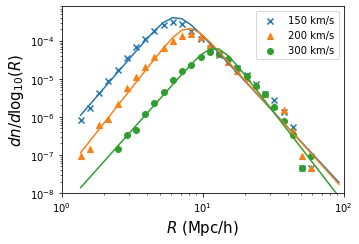

In [13]:
symbol = ["o", "^", "x"]

scale=0.8

fig = plt.figure(figsize=(6*scale,4*scale))
for i in range(2,-1,-1):
    print(i)
    
    index = np.where( ~ np.isnan(VoidSizeFunction[i][1]) )

    p_fit, p_cov = scipy.optimize.curve_fit(two_power_law_LOG10, 
                             VoidSizeFunction[i][0][index], 
                             np.log10(VoidSizeFunction[i][1][index]), 
                             p0= p0)

    print(p_fit)

    plt.plot(10**Bins_c, 
             10**two_power_law_LOG10(Bins_c, p_fit[0],  
                                     p_fit[1],  p_fit[2],  p_fit[3]))
    plt.scatter(10**VoidSizeFunction[i][0], VoidSizeFunction[i][1], 
                marker=symbol[i], label=labels[i])

plt.legend(loc=0)    
plt.ylim(1e-8,8e-4)
plt.xlim(1, 100)
plt.yscale("log")
plt.xscale("log")
plt.ylabel(r"$ dn / d \log_{10} (R)$", fontsize=15)
plt.xlabel(r"$R$ (Mpc/h)", fontsize=15)
plt.tight_layout()
plt.grid(False, which='both', axis="x")
plt.grid(False, which='both', axis="y")
plt.tight_layout(pad=0, rect=(0, 0, 1, 1))
plt.savefig("figures/void_size_function.pdf")

# Trimming the catalogs by minimum mass.

In [14]:
voids300_c = voids300[np.where(voids300[:,5] > R_cut)]
voids200_c = voids200[np.where(voids200[:,5] > R_cut)]
voids150_c = voids150[np.where(voids150[:,5] > R_cut)]

void_catalogs_cut = [voids300_c, voids200_c, voids150_c]

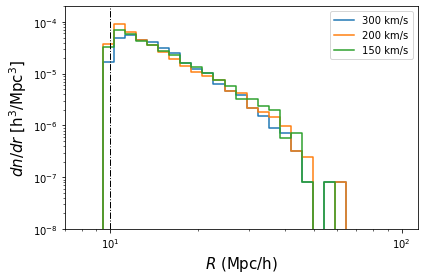

In [15]:
fig   = plt.figure(figsize=(6,4))

NBINS = 30

lnR_min = 0.9
lnR_max = 2.0


BINS  = np.linspace(lnR_min, lnR_max, NBINS)
Bin_width = (BINS[1] - BINS[0])

# Bins Edges array to plot steps.
X = []
for h in range(NBINS -1):
    X.extend([BINS[h], BINS[h+1]])
X = np.array(X)
    
# Bins centers
Bins_c = (BINS[:-1] + BINS[1:])/2


ncats = len(void_catalogs)

for i in range(ncats):
    R = void_catalogs_cut[i][:,5]
    log10R_hist, bin_edges = np.histogram( np.log10(R), bins=BINS)
    
    log10R_hist = log10R_hist / (Volume * Bin_width)
    
    Y = [log10R_hist[0]]
    for h in range(NBINS - 2):
        Y.extend([log10R_hist[h], log10R_hist[h+1]])
    Y.append(log10R_hist[-1])
    
    plt.plot(10**X, Y, label=labels[i])
    #plt.fill_between(Bins_plt, 1e-12, R_hisplt, label=labels[i], alpha=0.5)
    
plt.legend(loc=0)  
plt.axvline(R_cut, c="k", linewidth=1, linestyle="-.")    
#plt.xlim(lnR_min, lnR_max)
plt.ylim(1e-8,2e-4)
plt.yscale("log")
plt.xscale("log")
plt.ylabel(r"$ dn / dr \mathrm{\ [h^3 / Mpc^3]}$", fontsize=15)
plt.xlabel(r"$R$ (Mpc/h)", fontsize=15)
plt.tight_layout()

#plt.savefig("figures/void_size_function_R_min_cut.pdf")

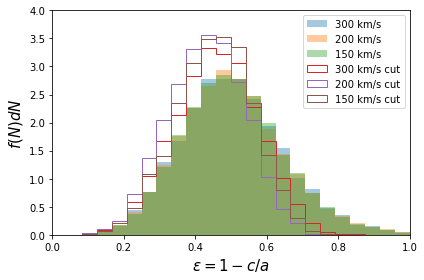

In [16]:
fig = plt.figure(figsize=(6,4))

for i in range(ncats):
    c = void_catalogs[i][:,8]
    a = void_catalogs[i][:,6]
    
    e = 1 - c/a
    
    e_hist, bins, stuff = plt.hist(e, bins=np.linspace(0,1,25), 
                                   density=True, histtype="stepfilled", alpha=0.4, label=labels[i])

labels_cut = ["300 km/s cut", "200 km/s cut", "150 km/s cut"]
    
for i in range(ncats):
    c = void_catalogs_cut[i][:,8]
    a = void_catalogs_cut[i][:,6]
    
    e = 1 - c/a
    
    e_hist, bins, stuff = plt.hist(e, bins=np.linspace(0,1,25), 
                                   density=True, histtype="step", label=labels_cut[i])    
    
plt.legend(loc=0)    
plt.xlim(0,1)
plt.ylim(0,4)
plt.ylabel(r"$f(N)dN$", fontsize=15)
plt.xlabel(r"$\epsilon = 1 - c/a$", fontsize=15)

plt.tight_layout()
plt.savefig("figures/ellipticity_combined.pdf")

300 km/s 0.5042377387924983 +/- 0.14347335891905436
200 km/s 0.5041512097835235 +/- 0.14360357900877257
150 km/s 0.504396707946565 +/- 0.14267912040933095
300 km/s cut 0.4579084628366487 +/- 0.11602432679815465
200 km/s cut 0.4316279175498902 +/- 0.10604005439433788
150 km/s cut 0.45254654160547264 +/- 0.10669041718807934


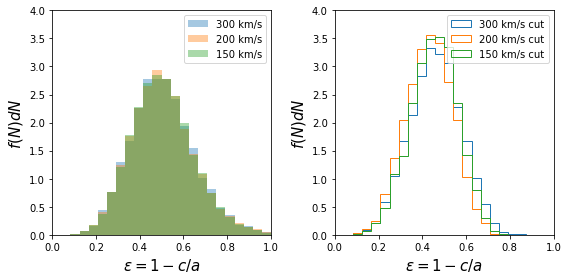

In [17]:
fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(121)
for i in range(ncats):
    c = void_catalogs[i][:,8]
    a = void_catalogs[i][:,6]
    
    e = 1 - c/a
    
    e_hist, bins, stuff = ax1.hist(e, bins=np.linspace(0,1,25), 
                                   density=True, histtype="stepfilled", alpha=0.4, label=labels[i])

    print(labels[i], e.mean(),"+/-", e.std())
    
ax1.legend(loc=0)    
ax1.set_xlim(0,1)
ax1.set_ylim(0,4)
ax1.set_ylabel(r"$f(N)dN$", fontsize=15)
ax1.set_xlabel(r"$\epsilon = 1 - c/a$", fontsize=15)    
    
ax2 = fig.add_subplot(122)    
for i in range(ncats):
    c = void_catalogs_cut[i][:,8]
    a = void_catalogs_cut[i][:,6]
    
    e = 1 - c/a
    
    e_hist, bins, stuff = ax2.hist(e, bins=np.linspace(0,1,25), 
                                   density=True, histtype="step", label=labels_cut[i])    
    
    print(labels_cut[i], e.mean(),"+/-", e.std())

ax2.legend(loc=0)    
ax2.set_xlim(0,1)
ax2.set_ylim(0,4)
ax2.set_ylabel(r"$f(N)dN$", fontsize=15)
ax2.set_xlabel(r"$\epsilon = 1 - c/a$", fontsize=15)
plt.tight_layout()
#plt.savefig("figures/ellipticity_combined_1.pdf")

# Using SCIPY STATS GAUSSIAN_KDE


a = voids300_c[:,6]
b = voids300_c[:,7]
c = voids300_c[:,8]

m1, m2 = b/a, c/b

data = np.vstack((m1,m2))

xmin, xmax = 0, 1
ymin, ymax = 0, 1

kde = scipy.stats.gaussian_kde(data)

xx, yy = np.mgrid[-3:3:.01, -1:4:.01]
density = kde(np.c_[xx.flat, yy.flat].T).reshape(xx.shape)

f, ax = plt.subplots()
cset = ax.contourf(xx, yy, density, cmap="viridis")
f.colorbar(cset)

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

In [22]:
def plot_single_cat(ax, cat):
    a = cat[:,6]
    b = cat[:,7]
    c = cat[:,8]

    epsilon, m1, m2 = 1 - c/a, b/a, c/b
    xmin, xmax = 0, 1
    ymin, ymax = 0, 1
    
    X, Y, Z = density_estimation(m1, m2, xmin, xmax, ymin, ymax)
    ax.imshow(np.rot90(Z), cmap=plt.cm.terrain_r, extent=[xmin, xmax, ymin, ymax])
    ax.contour(X, Y, Z, cmap="terrain")
    
    epsilon_per = np.percentile(epsilon, [25, 50, 75])
    m1_per = np.percentile(m1, [25, 50, 75])
    m2_per = np.percentile(m2, [25, 50, 75])
    
    epsilon_low  = epsilon_per[0] -  epsilon_per[1]
    epsilon_mean = epsilon_per[1]
    epsilon_high = epsilon_per[2] -  epsilon_per[1]

    m1_low  = m1_per[0] -  m1_per[1]
    m1_mean = m1_per[1]
    m1_high = m1_per[2] -  m1_per[1]
    
    m2_low  = m2_per[0] -  m2_per[1]
    m2_mean = m2_per[1]
    m2_high = m2_per[2] -  m2_per[1]
    

    print("    epsilon = {:0.2f}_{{{:0.2f}}}^{{+{:0.2f}}}".format(
        epsilon_mean, epsilon_low, epsilon_high) )  
    print("         m1 = {:0.2f}_{{{:0.2f}}}^{{+{:0.2f}}}".format(m1_mean, m1_low, m1_high) )
    print("         m2 = {:0.2f}_{{{:0.2f}}}^{{+{:0.2f}}}".format(m2_mean, m2_low, m2_high) )

300 km/s
    Full
    epsilon = 0.50_{-0.09}^{+0.10}
         m1 = 0.73_{-0.10}^{+0.09}
         m2 = 0.71_{-0.12}^{+0.10}
200 km/s
    Full
    epsilon = 0.50_{-0.09}^{+0.10}
         m1 = 0.72_{-0.10}^{+0.09}
         m2 = 0.72_{-0.11}^{+0.10}
150 km/s
    Full
    epsilon = 0.50_{-0.09}^{+0.10}
         m1 = 0.72_{-0.10}^{+0.09}
         m2 = 0.72_{-0.12}^{+0.10}
300 km/s
     Trim
    epsilon = 0.46_{-0.08}^{+0.08}
         m1 = 0.74_{-0.09}^{+0.08}
         m2 = 0.75_{-0.09}^{+0.08}
200 km/s
     Trim
    epsilon = 0.43_{-0.07}^{+0.07}
         m1 = 0.74_{-0.09}^{+0.08}
         m2 = 0.79_{-0.08}^{+0.07}
150 km/s
     Trim
    epsilon = 0.46_{-0.08}^{+0.07}
         m1 = 0.71_{-0.10}^{+0.09}
         m2 = 0.79_{-0.07}^{+0.07}


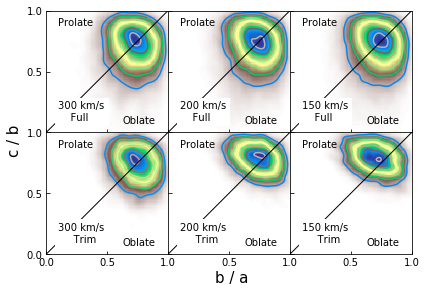

In [23]:
catalogs = [voids300, voids200, voids150, voids300_c, voids200_c, voids150_c]
titles = ["(a)", "(b)", "(c)", "(d)" ,"(e)" ,"(f)"]
kms    = ["300 km/s\n    Full", "200 km/s\n    Full", "150 km/s\n    Full", 
          "300 km/s\n     Trim", "200 km/s\n     Trim", "150 km/s\n     Trim"]

xlabel="b / a"
ylabel="c / b"
nrows = 2
ncols = 3
props = dict(boxstyle='square', facecolor='white', ec="white", alpha=1.0)


fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6,4))

unitary = np.linspace(0,1)
k = 0

for i in range(nrows):
    for j in range(ncols):   
        print(kms[k])
        ax[i][j].plot(unitary, unitary, c="k", linewidth=1)
        plot_single_cat(ax[i][j], catalogs[k])
        #ax[i][j].scatter(0.5,0.5)
        
        ax[i][j].text(0.1, 0.1, kms[k], bbox=props)
        
        ax[i][j].text(0.9, 0.1,  "Oblate", horizontalalignment="right", verticalalignment="center" )
        ax[i][j].text(0.1, 0.9, "Prolate", horizontalalignment="left", verticalalignment="center" )
        ax[i][j].set_xlim(0,1)
        ax[i][j].set_ylim(0,1)

        ax[i][j].tick_params(axis="both", direction="in")
        ax[i][j].set_xticks([0.0, 0.5,1.0])
        ax[i][j].set_yticks([0.0, 0.5,1.0])

        ax[i][j].set_xticklabels(["", "",""])
        ax[i][j].set_yticklabels(["", "",""])

        if (i==1)&(j==0):    
            ax[i][j].set_xticklabels(["0.0", "0.5","1.0"])
            ax[i][j].set_yticklabels(["0.0", "0.5","1.0"])
        elif (i==0)&(j==0):    
            ax[i][j].set_xticklabels(["", "",""])
            ax[i][j].set_yticklabels(["", "0.5","1.0"])
        elif (i==1):
            ax[i][j].set_xticklabels(["", "0.5","1.0"])

        k +=1

            
fig.text(0.50, 0.02, xlabel, va='center', fontsize=15)        
fig.text(0.02, 0.50, ylabel, va='center', rotation='vertical', fontsize=15)    
            

    
plt.tight_layout(rect=(0.04, 0.02, 1.0, 1.0))
fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig("figures/prolatness_merged_kms.pdf")

In [20]:
def plot_single_cat_ep(ax, cat):
    a = cat[:,6]
    b = cat[:,7]
    c = cat[:,8]

    e = ellipticity(a,b,c)
    p = prolatness(a,b,c)
    
    e_per = np.percentile(e, [25, 50, 75])
    p_per = np.percentile(p, [25, 50, 75])
    
    e_low  = e_per[0] -  e_per[1]
    e_mean = e_per[1]
    e_high = e_per[2] -  e_per[1]
    
    p_low  = p_per[0] -  p_per[1]
    p_mean = p_per[1]
    p_high = p_per[2] -  p_per[1]
    
    print("    e = {:0.3f}_{{{:0.3f}}}^{{+{:0.3f}}}".format(e_mean, e_low, e_high) )
    print("    p = {:0.3f}_{{{:0.3f}}}^{{+{:0.3f}}}".format(p_mean, p_low, p_high) )
    
    xmin, xmax, ymin, ymax =  0, 0.25, -0.25, 0.25
    X, Y, Z = density_estimation(e, p, xmin, xmax, ymin, ymax)
    ax.imshow(np.rot90(Z), cmap=plt.cm.terrain_r, extent=[xmin, xmax, ymin, ymax])
    ax.contour(X, Y, Z, cmap="terrain")

300 km/s
    Full
    e = 0.105_{-0.023}^{+0.026}
    p = -0.032_{-0.034}^{+0.032}
200 km/s
    Full
    e = 0.105_{-0.023}^{+0.026}
    p = -0.032_{-0.035}^{+0.032}
100 km/s
    Full
    e = 0.105_{-0.023}^{+0.025}
    p = -0.032_{-0.036}^{+0.032}
300 km/s
     Trim
    e = 0.096_{-0.020}^{+0.021}
    p = -0.028_{-0.030}^{+0.030}
200 km/s
     Trim
    e = 0.090_{-0.020}^{+0.021}
    p = -0.033_{-0.032}^{+0.029}
150 km/s
     Trim
    e = 0.097_{-0.020}^{+0.023}
    p = -0.044_{-0.033}^{+0.032}


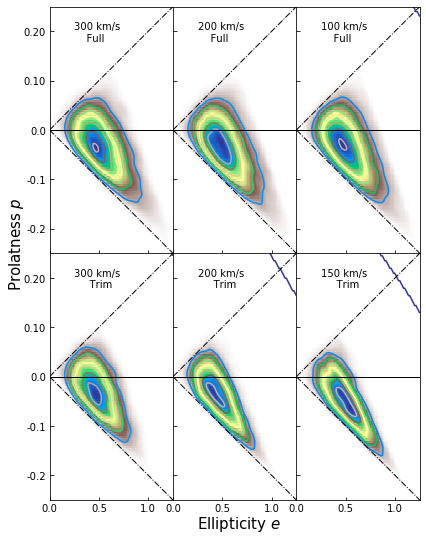

In [21]:
catalogs = [voids300, voids200, voids150, voids300_c, voids200_c, voids150_c]
titles = ["(a)", "(b)", "(c)", "(d)" ,"(e)" ,"(f)"]
kms    = ["300 km/s\n    Full", "200 km/s\n    Full", "100 km/s\n    Full", 
          "300 km/s\n     Trim", "200 km/s\n     Trim", "150 km/s\n     Trim"]

xlabel=r"Ellipticity $e$"
ylabel=r"Prolatness $p$"
nrows = 2
ncols = 3
props = dict(boxstyle='square', facecolor='white', ec="white", alpha=1.0)
xmin, xmax, ymin, ymax =  0, 0.25, -0.25, 0.25


fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6,7.49))

unity = np.array([0,0.25])
k = 0

for i in range(nrows):
    for j in range(ncols):
        
        print(kms[k])
        plot_single_cat_ep(ax[i][j], catalogs[k])
        
        #ax[i][j].scatter(0.0,-0.25)
        #ax[i][j].scatter(0.25,0.25)
        ax[i][j].plot(unity,  unity, linestyle="-.", color="k", lw=1)
        ax[i][j].plot(unity, -unity, linestyle="-.", color="k", lw=1)
        ax[i][j].axhline(0, color="k", lw=1)
        ax[i][j].text(0.05, 0.18, kms[k], bbox=props)
        
        ax[i][j].set_xlim(xmin, xmax)
        ax[i][j].set_ylim(ymin, ymax)
        ax[i][j].tick_params(axis="both", direction="in")
        ax[i][j].set_xticks([0.0, 0.10,0.20])
        ax[i][j].set_yticks([-0.2, -0.1, 0.0, 0.1,0.2])
        ax[i][j].set_xticklabels(["", "",""])
        ax[i][j].set_yticklabels(["", "", "", "", ""])
        if (i==1)&(j==0):    
            ax[i][j].set_xticklabels(["0.0", "0.5","1.0"])
            ax[i][j].set_yticklabels(["-0.2", "-0.1", "0.0", "0.10","0.20"])
        elif (i==0)&(j==0):    
            #ax[i][j].set_xticklabels(["", "",""])
            ax[i][j].set_yticklabels(["-0.2", "-0.1", "0.0", "0.10","0.20"])
        elif (i==1):
            ax[i][j].set_xticklabels(["0.0", "0.5","1.0"])

        k +=1
        
fig.text(0.46, 0.02, xlabel, va='center', fontsize=15)        
fig.text(0.02, 0.54, ylabel, va='center', rotation='vertical', fontsize=15)            
plt.tight_layout(rect=(0.04, 0.02, 1.0, 1.0))
fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig("figures/ellipticity_vs_prolatness.pdf")